# Do people have a preference for private cycles vs cycle hires?

## Prepare workstation and import files

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data files
central_london = pd.read_csv("Central London.csv")
inner_london = pd.read_csv("Inner London.csv")

C:\Users\mhbil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mhbil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Explore raw data

### Central London

In [3]:
print(central_london.shape)

(1048366, 17)


In [4]:
print(central_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [5]:
print(central_london.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location    Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morni

In [6]:
print(central_london.describe())

          Start hour   Start minute  Number of private cycles  \
count  758163.000000  758163.000000             758099.000000   
mean       13.499259      22.499951                 14.824374   
std         4.609643      16.770530                 26.255858   
min         6.000000       0.000000                  0.000000   
25%         9.000000       0.000000                  2.000000   
50%        13.000000      15.000000                  7.000000   
75%        17.000000      30.000000                 16.000000   
max        21.000000      45.000000               1177.000000   

       Number of cycle hire bikes   Total cycles  Unnamed: 14  Unnamed: 15  \
count               758099.000000  758163.000000          0.0          0.0   
mean                     1.830072      16.653040          NaN          NaN   
std                      3.321560      28.675116          NaN          NaN   
min                      0.000000       0.000000          NaN          NaN   
25%                     

Observations: Central London contains info on the date ('Survey wave (calendar quarter)', 'Equivalent financial quarter', 'Survey Date'), time ('Time', 'Period', 'Start hour', 'Start minute'), location ('Site ID', 'Location'), weather ('Weather'), direction of travel ('Direction'), and number of cycles ('Number of private cycles', 'Number of cycle hire bikes', 'Total cycles'). 'Unnamed: 14' , 'Unnamed: 15', and 'Unnamed: 16' can be removed since they contain empty values. There are missing values for 'Survey date,' 'Weather,' 'Number of private cycles,' and 'Number of cycle hire bikes.'

### Inner London

In [7]:
print(inner_london.shape)

(615168, 13)


In [8]:
print(inner_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

In [9]:
print(inner_london.head())

   Survey wave (year)   Site ID    Location    Survey date Weather  \
0              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
1              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
2              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
3              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
4              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                       1.0                         0.0   
1     

In [10]:
print(inner_london.describe())

       Survey wave (year)     Start hour   Start minute  \
count       523776.000000  523770.000000  523770.000000   
mean          2017.986070      13.499914      22.499914   
std              2.035381       4.609733      16.770551   
min           2015.000000       6.000000       0.000000   
25%           2016.000000       9.000000       0.000000   
50%           2018.000000      13.000000      15.000000   
75%           2020.000000      17.000000      30.000000   
max           2021.000000      21.000000      45.000000   

       Number of private cycles  Number of cycle hire bikes   Total cycles  
count             523776.000000               523776.000000  523776.000000  
mean                   5.929833                    0.267943       6.196408  
std                   10.937833                    0.944529      11.309639  
min                    0.000000                    0.000000       0.000000  
25%                    1.000000                    0.000000       1.000000  
50%   

Observations: Inner London contains info on the date ('Survey wave (year)','Survey Date'), time ('Time', 'Period', 'Start hour', 'Start minute'), location ('Site ID', 'Location'), weather ('Weather'), direction of travel ('Direction'), and number of cycles ('Number of private cycles', 'Number of cycle hire bikes', 'Total cycles'). There are missing values for 'Survey date','Weather', 'Time', 'Period', 'Start hour', and 'Start minute'.

## Concatentate and clean data

In [11]:
# Concatente data and reset index
london_centralandinner = pd.concat([central_london, inner_london], ignore_index = True)

In [12]:
# Examine shape of new data
print(london_centralandinner.shape)

(1663534, 18)


In [13]:
# Examine content of new data
print(london_centralandinner.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location    Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morni

In [14]:
print(london_centralandinner.tail())

        Survey wave (calendar quarter) Equivalent financial quarter Site ID  \
1663529                            NaN                          NaN     NaN   
1663530                            NaN                          NaN     NaN   
1663531                            NaN                          NaN     NaN   
1663532                            NaN                          NaN     NaN   
1663533                            NaN                          NaN     NaN   

        Location Survey date Weather Time Period Direction  Start hour  \
1663529      NaN         NaN     NaN  NaN    NaN       NaN         NaN   
1663530      NaN         NaN     NaN  NaN    NaN       NaN         NaN   
1663531      NaN         NaN     NaN  NaN    NaN       NaN         NaN   
1663532      NaN         NaN     NaN  NaN    NaN       NaN         NaN   
1663533      NaN         NaN     NaN  NaN    NaN       NaN         NaN   

         Start minute  Number of private cycles  Number of cycle hire bikes  \
1

In [15]:
print(london_centralandinner.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663534 entries, 0 to 1663533
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Survey wave (calendar quarter)  758163 non-null   object 
 1   Equivalent financial quarter    758163 non-null   object 
 2   Site ID                         1281939 non-null  object 
 3   Location                        1281939 non-null  object 
 4   Survey date                     1269031 non-null  object 
 5   Weather                         1265431 non-null  object 
 6   Time                            1281933 non-null  object 
 7   Period                          1281933 non-null  object 
 8   Direction                       1281939 non-null  object 
 9   Start hour                      1281933 non-null  float64
 10  Start minute                    1281933 non-null  float64
 11  Number of private cycles        1281875 non-null  float64
 12  

In [16]:
# Drop unneeded columns
london_centralandinner_clean = london_centralandinner.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [17]:
# Create Month column
london_centralandinner_clean['Month'] = london_centralandinner_clean['Survey date'].str.split('/').str[1]

In [18]:
# Create Year column
london_centralandinner_clean['Year'] = london_centralandinner_clean['Survey date'].str.split('/').str[2]

## Exploratory Data Analysis

<AxesSubplot:xlabel='Number of private cycles', ylabel='Total cycles'>

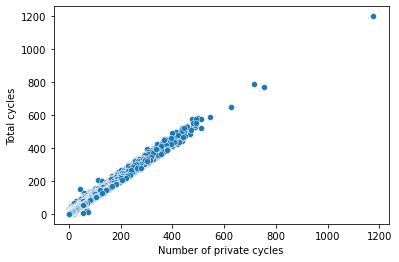

In [19]:
# Examine relationship between number of cycles and private cycles
sns.scatterplot(x='Number of private cycles', y='Total cycles', data= london_centralandinner_clean)

<AxesSubplot:xlabel='Number of cycle hire bikes', ylabel='Total cycles'>

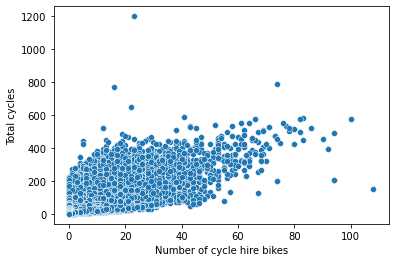

In [20]:
# Examine relationship between number of cycles and cycle hires
sns.scatterplot(x='Number of cycle hire bikes', y='Total cycles', data= london_centralandinner_clean)

Observations: There is a much stronger linear relationship between total cycles and private cycles

<AxesSubplot:xlabel='Year', ylabel='Number of private cycles'>

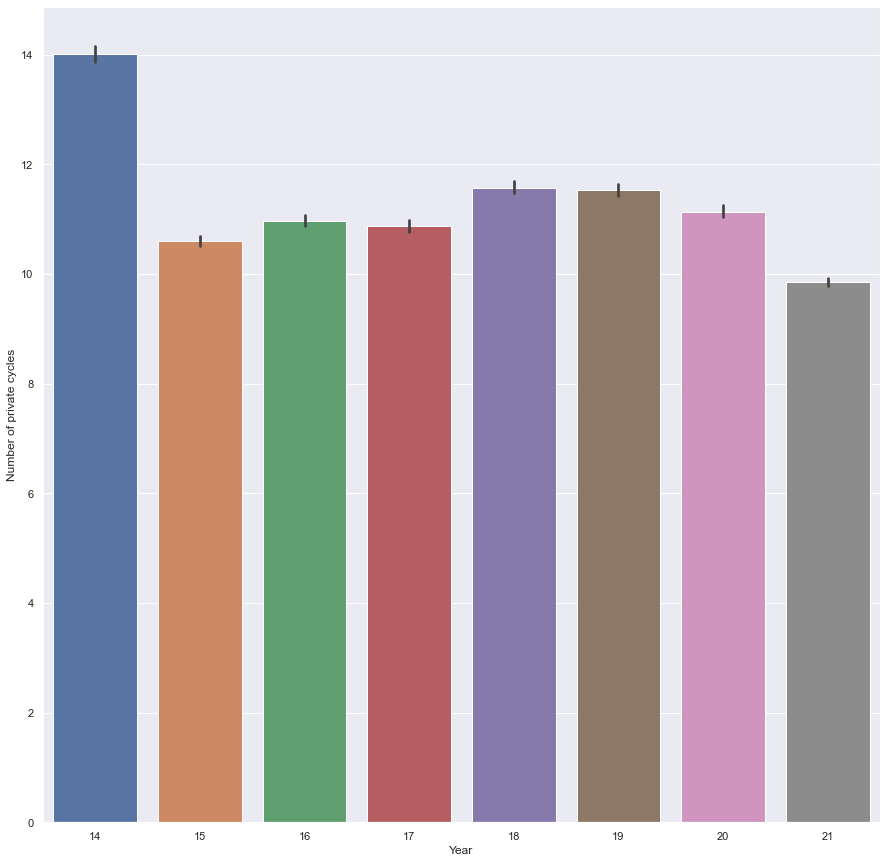

In [29]:
# Examine number of private cycles over time - by year
sns.barplot(x="Year", y="Number of private cycles", data=london_centralandinner_clean)

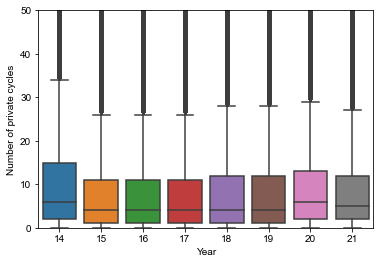

In [24]:
# Examine number of private cycles over time - by year
sns.boxplot(x="Year", y="Number of private cycles", data=london_centralandinner_clean)
plt.ylim(0,50)
sns.set(rc = {'figure.figsize':(15,15)})

<AxesSubplot:xlabel='Year', ylabel='Number of cycle hire bikes'>

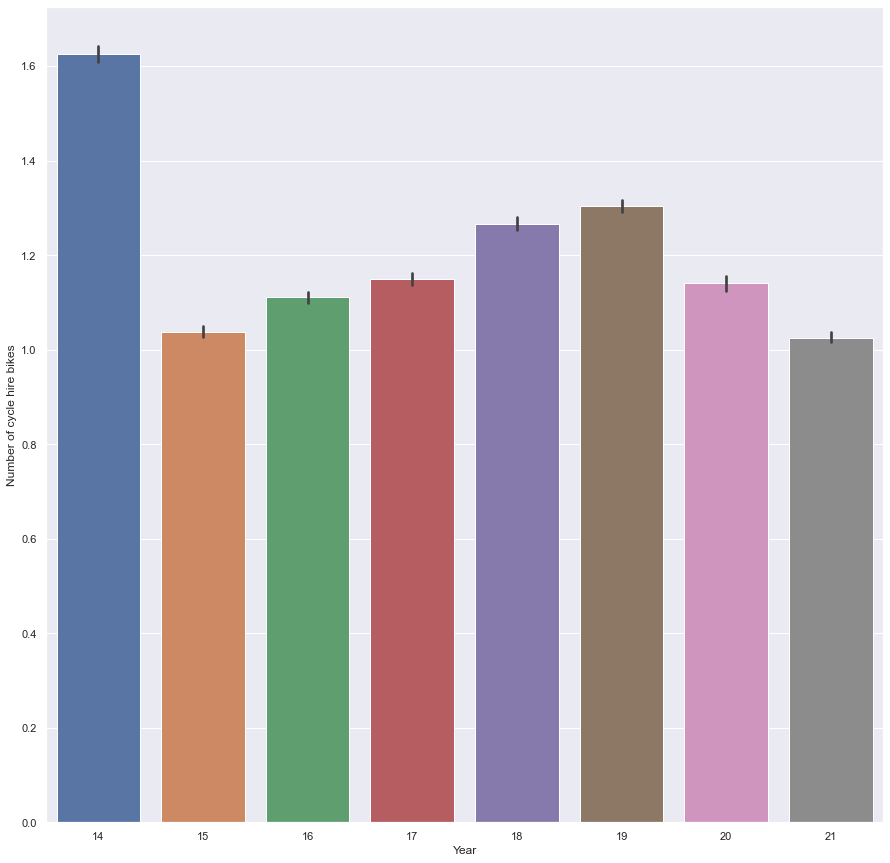

In [31]:
# Examine number of cycle hires over time - by year
sns.barplot(x="Year", y="Number of cycle hire bikes", data=london_centralandinner_clean)

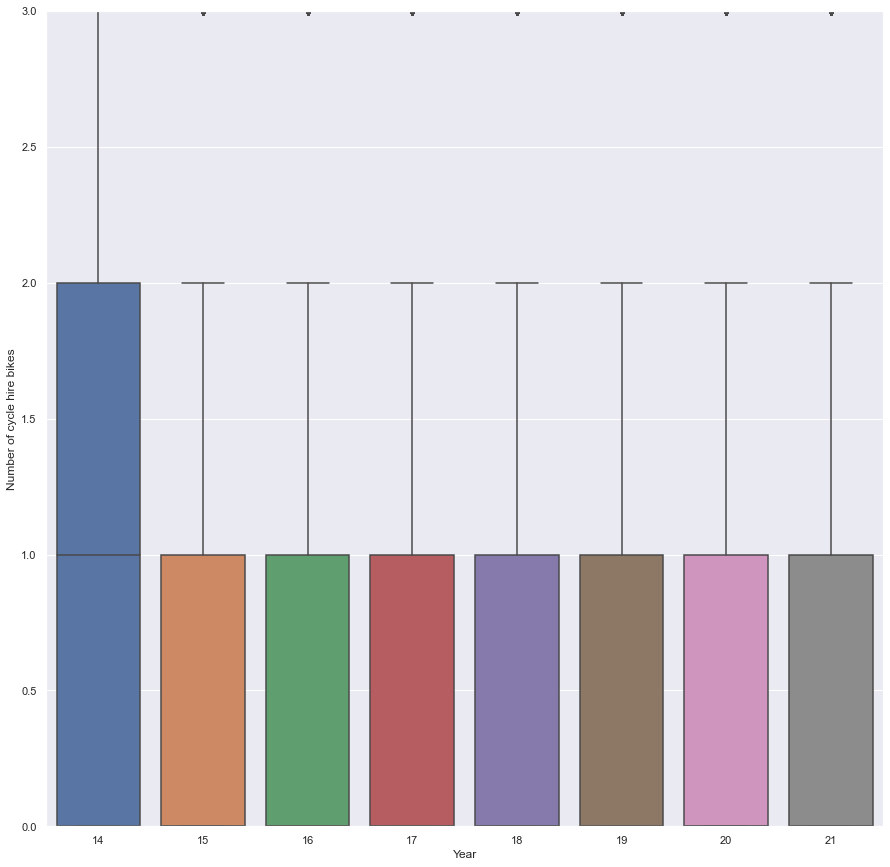

In [30]:
# Examine number of cycle hires over time - by year
sns.boxplot(x="Year", y="Number of cycle hire bikes", data=london_centralandinner_clean)
plt.ylim(0,3)
sns.set(rc = {'figure.figsize':(15,15)})